# Linear Regression

Add cells for your answers as needed after each question.

1. Create a sample dataset $\{ (x^{(i)},y^{(i)}) \}$  of 1000 examples where 
    * $x$ and $y$ are approximately linearly dependent. You may pick the parameters $w,b$ as you like.
    * $y - (w x+b)$ is normal distributed. 
    
Plot $x$ vs $y$ and histogram $y - (w x+b)$.
   

In [1]:
# We will need to call on the numpy and matplotlib modules for this lab.
import numpy as np
import copy
import math
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
# Creating a function here that will generate our data to be used.
def linear_graph(N=1000, w=3., b=4., s=0.25, min_x=0., max_x=1.): #This will control the physical characteristics of how our graph looks like.
    x = (max_x-min_x)*np.random.random(N)+min_x
    return x, np.random.normal(0,s,N) + w*(x)+b 

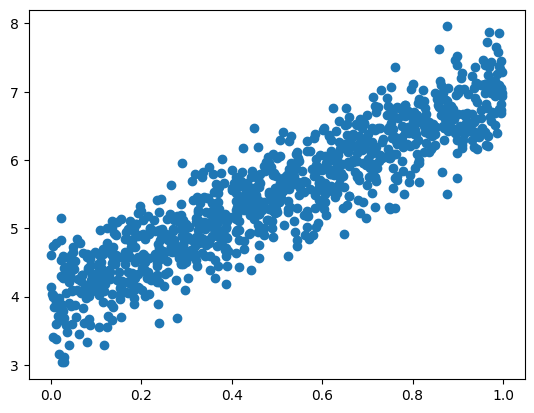

In [3]:
plt.scatter(*linear_graph(s=0.4)) # Here s controls how density our random points are where as s increases the data gets less dense.

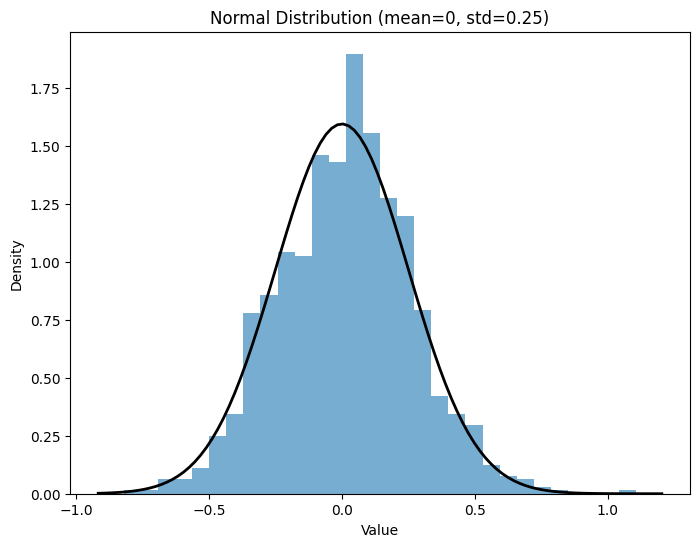

In [4]:
# Here we histogram y-w*x+b to show that our randomness that we introduce is normally distributed.
# For our data y-w*x+b = np.random.normal(0, s, N)

data = np.random.normal(0, 0.25, 1000)

# With this data now in place we will make a graph down below.
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=True, alpha=0.6) # By making density = True we can see the data as a % so that the AUC = 1

# Here is where we can plot the normal distribution curve to help us get a sense of how it fits with a normally distributed line.
mean, std_dev = 0, 0.25
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = 1/(std_dev * np.sqrt(2 * np.pi)) * np.exp(-0.5 * ((x - mean) / std_dev)**2)
plt.plot(x, p, 'k', linewidth=2)

plt.title('Normal Distribution (mean=0, std=0.25)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()


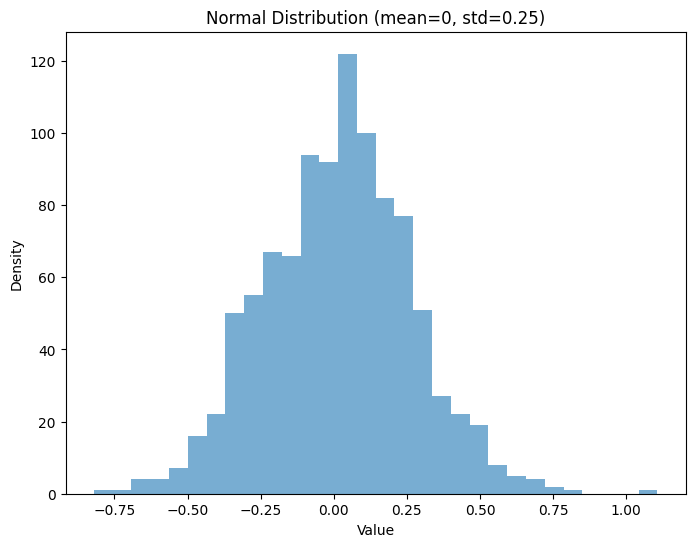

In [5]:
# Now lets see the raw data being graphed instead.
plt.figure(figsize=(8, 6))
plt.hist(data, bins=30, density=False, alpha=0.6)
plt.title('Normal Distribution (mean=0, std=0.25)')
plt.xlabel('Value')
plt.ylabel('Density')
plt.show()

2. Create functions `model_loop(x,w,b)` and `model_np(x,w,b)` that compute $y=wx+b$, the first using explicit loops, the second computing using numpy and no loops. Illustrate that the two functions create identical output. Use numpy version for the remainder of the lab.

In [6]:
# Function using explicit loops
def model_loop(x, w, b):
    y = []
    for i in range(len(x)):
        y.append(w * x[i] + b)
    return np.array(y)

# Function using numpy and no loops
def model_np(x, w, b):
    return w * x + b

# Sample data for testing
x = np.array([1, 2, 3, 4, 5])
w = 2
b = 1

# Calculating outputs
output_loop = model_loop(x, w, b)
output_np = model_np(x, w, b)

# Checking if both outputs are identical
outputs_equal = np.array_equal(output_loop, output_np)

print("Output using model_loop:", output_loop)
print("Output using model_np:", output_np)
print("Are the outputs identical?", outputs_equal)


Output using model_loop: [ 3  5  7  9 11]
Output using model_np: [ 3  5  7  9 11]
Are the outputs identical? True


3. Plot $x$ vs $y$ and compare to $x$ vs. $wx+b$ for the parameters from exercise 1.

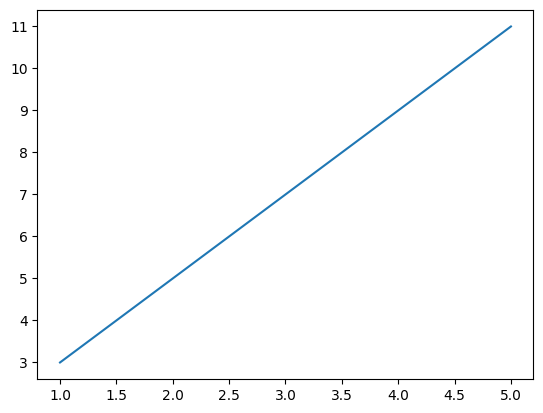

In [7]:
# By using the above function created, we can call upon model_np to create a plot line to use here in a x vs. y comparison.
plot_1 = model_np(x,w,b)
plt.plot(x,plot_1)
plt.show()

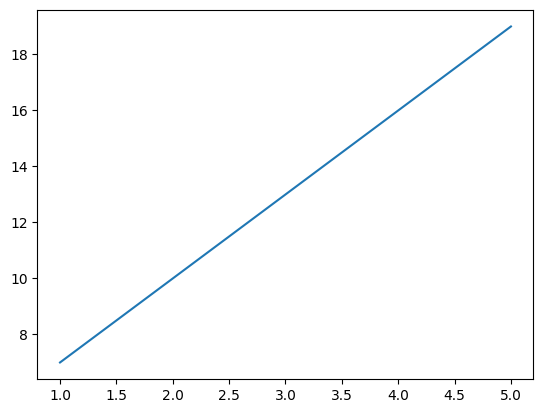

In [8]:
# Here we can call upon the parameters we used for exercise 1 to use as a comparison.
w=3
b=4
plot_2 = model_np(x,w,b)
plt.plot(x, plot_2)
plt.show()
# From here we can see that the y=wx+b we see it is a much steeper linear line.

4. Create a function `cost(x,y,w,b)` that computes the mean square error between model prediction and data. Use numpy expressions and do not do any explicit loops in python. Make 2 plots illusrating the parabolic shape of the cost function:
   * Plot the cost vs $w$ for the dataset, holding $b$ constant. 
   * Plot the cost vs $b$ for the dataset, holding $w$ constant. 


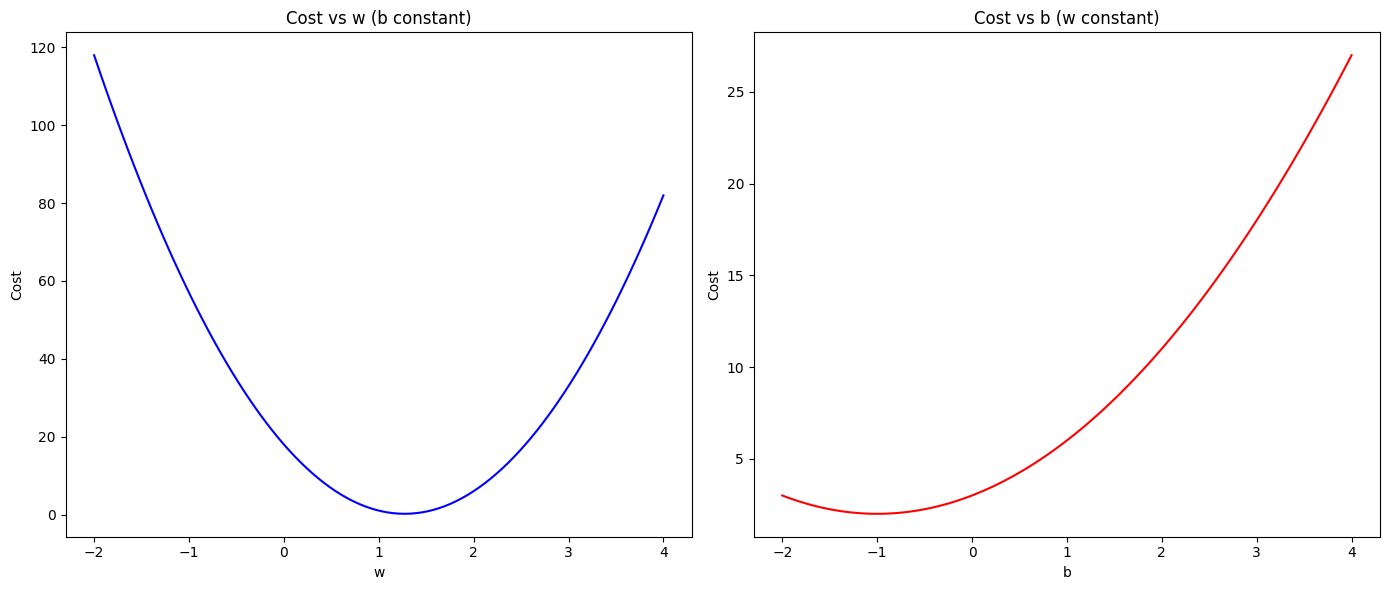

In [9]:
# Function to compute mean square error
def cost(x, y, w, b):
    predictions = w * x + b
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 5, 6, 7])  # Example dataset with a linear trend

# Values for plotting cost vs w, keeping b constant
w_values = np.linspace(-2, 4, 100)
b_constant = 1
cost_w = [cost(x, y, w, b_constant) for w in w_values]

# Values for plotting cost vs b, keeping w constant
b_values = np.linspace(-2, 4, 100)
w_constant = 2
cost_b = [cost(x, y, w_constant, b) for b in b_values]

# Plotting cost vs w
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(w_values, cost_w, 'b-')
plt.title('Cost vs w (b constant)')
plt.xlabel('w')
plt.ylabel('Cost')

# Plotting cost vs b
plt.subplot(1, 2, 2)
plt.plot(b_values, cost_b, 'r-')
plt.title('Cost vs b (w constant)')
plt.xlabel('b')
plt.ylabel('Cost')

plt.tight_layout()
plt.show()


5. Create a function `dj_dw, dj_db = gradient(x, y, w, b)` that computes the gradient wrt $w$ and $b$ on a dataset. Use numpy expressions and do not do any explicit loops in python. Make 2 plots that illustrates that the gradient is 0 at the optimal values of $w$ and $b$ by:
   * Ploting the gradient vs $w$ for the dataset, holding $b$ constant. 
   * Ploting the gradient vs $b$ for the dataset, holding $w$ constant. 

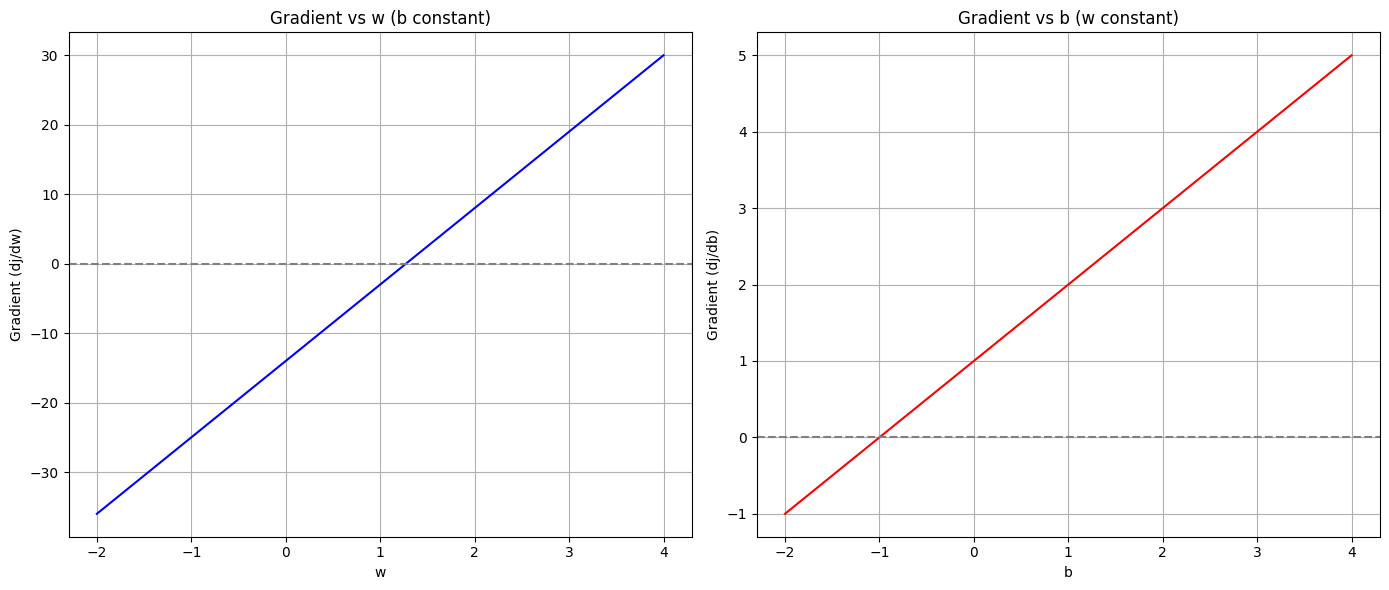

In [10]:
# Function to compute gradients with respect to w and b
def gradient(x, y, w, b):
    m = len(x)  # Number of data points
    predictions = w * x + b
    errors = predictions - y
    
    # Gradient with respect to w
    dj_dw = (1/m) * np.sum(errors * x)
    
    # Gradient with respect to b
    dj_db = (1/m) * np.sum(errors)
    
    return dj_dw, dj_db

# Sample data
x = np.array([1, 2, 3, 4, 5])
y = np.array([3, 4, 5, 6, 7])  # Example dataset with a linear trend

# Values for plotting gradient vs w, keeping b constant
w_values = np.linspace(-2, 4, 100)
b_constant = 1
gradient_w = [gradient(x, y, w, b_constant)[0] for w in w_values]

# Values for plotting gradient vs b, keeping w constant
b_values = np.linspace(-2, 4, 100)
w_constant = 2
gradient_b = [gradient(x, y, w_constant, b)[1] for b in b_values]

# Plotting gradient vs w
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
plt.plot(w_values, gradient_w, 'b-')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Gradient vs w (b constant)')
plt.xlabel('w')
plt.ylabel('Gradient (dj/dw)')
plt.grid(True)

# Plotting gradient vs b
plt.subplot(1, 2, 2)
plt.plot(b_values, gradient_b, 'r-')
plt.axhline(0, color='gray', linestyle='--')
plt.title('Gradient vs b (w constant)')
plt.xlabel('b')
plt.ylabel('Gradient (dj/db)')
plt.grid(True)
plt.tight_layout()
plt.show()


6. Use the following `gradient_descent` function to "fit" a line to the data.  Make sure you do not start at the optimal values from exercise 1. You may have to try different values of `alpha`. 

In [11]:
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient): 
    w = copy.deepcopy(w_in) 
    
    J_history = []
    p_history = []

    b = b_in
    w = w_in
    
    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w , b)     

        b = b - alpha * dj_db                            
        w = w - alpha * dj_dw                            

        if i<100000:    
            J_history.append( cost(x, y, w , b))
            p_history.append([w,b])
            
        if i% math.ceil(num_iters/10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")
 
    return w, b, J_history, p_history 

Iteration    0: Cost 2.35e+01  dj_dw: -2.924e+00, dj_db: -5.468e+00   w:  2.924e-01, b: 5.46841e-01
Iteration  100: Cost 7.32e-02  dj_dw: -2.255e-02, dj_db:  1.182e-02   w:  2.613e+00, b: 4.19878e+00
Iteration  200: Cost 6.61e-02  dj_dw: -1.170e-02, dj_db:  6.136e-03   w:  2.778e+00, b: 4.11235e+00
Iteration  300: Cost 6.42e-02  dj_dw: -6.068e-03, dj_db:  3.183e-03   w:  2.864e+00, b: 4.06750e+00
Iteration  400: Cost 6.36e-02  dj_dw: -3.148e-03, dj_db:  1.651e-03   w:  2.908e+00, b: 4.04424e+00
Iteration  500: Cost 6.35e-02  dj_dw: -1.633e-03, dj_db:  8.568e-04   w:  2.931e+00, b: 4.03217e+00
Iteration  600: Cost 6.35e-02  dj_dw: -8.472e-04, dj_db:  4.445e-04   w:  2.943e+00, b: 4.02591e+00
Iteration  700: Cost 6.35e-02  dj_dw: -4.395e-04, dj_db:  2.306e-04   w:  2.949e+00, b: 4.02266e+00
Iteration  800: Cost 6.35e-02  dj_dw: -2.280e-04, dj_db:  1.196e-04   w:  2.952e+00, b: 4.02097e+00
Iteration  900: Cost 6.35e-02  dj_dw: -1.183e-04, dj_db:  6.207e-05   w:  2.954e+00, b: 4.02010e+00


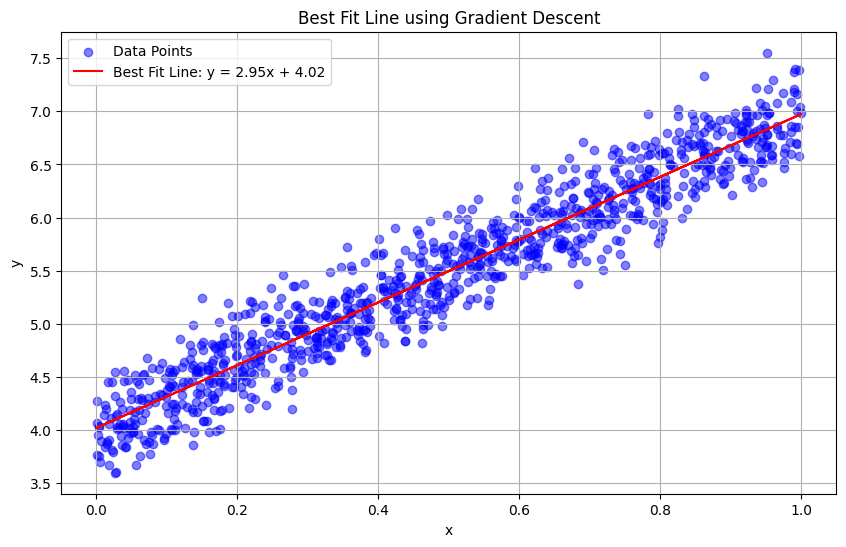

In [12]:
# Function to compute gradients with respect to w and b
def gradient(x, y, w, b):
    m = len(x)
    predictions = w * x + b
    errors = predictions - y
    dj_dw = (1/m) * np.sum(errors * x)
    dj_db = (1/m) * np.sum(errors)
    return dj_dw, dj_db

# Function to compute the mean square error
def cost(x, y, w, b):
    predictions = w * x + b
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Gradient descent function to adjust w and b (re-did it here for simplicity for me)
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient):
    w = copy.deepcopy(w_in)
    b = b_in
    w = w_in
    J_history = []
    p_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w, b)

        # Update parameters
        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        # Save cost J at each iteration
        if i < 100000:    
            J_history.append(cost(x, y, w, b))
            p_history.append([w, b])

        # Print every 10% of iterations
        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

# Function to generate linear data with noise
def linear_graph(N=1000, w=3., b=4., s=0.25, min_x=0., max_x=1.):
    x = (max_x - min_x) * np.random.random(N) + min_x
    return x, np.random.normal(0, s, N) + w * x + b

# Generate data
x, y = linear_graph(N=1000, w=3., b=4., s=0.25)

# Initialize parameters for gradient descent
w_init = 0.0
b_init = 0.0
alpha = 0.1
num_iters = 1000

# Run gradient descent to fit the line
w_final, b_final, J_history, p_history = gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost, gradient)

# Plotting the scatter plot of the data
plt.figure(figsize=(10, 6))
plt.scatter(x, y, color='blue', alpha=0.5, label='Data Points')

# Plotting the best fit line
y_pred = w_final * x + b_final
plt.plot(x, y_pred, color='red', label=f'Best Fit Line: y = {w_final:.2f}x + {b_final:.2f}')

plt.xlabel('x')
plt.ylabel('y')
plt.title('Best Fit Line using Gradient Descent')
plt.legend()
plt.grid(True)
plt.show()


7. Plot the cost and parameters versus iteration of gradient descent.

Iteration    0: Cost 2.39e+01  dj_dw: -3.057e+00, dj_db: -5.535e+00   w:  3.057e-01, b: 5.53453e-01
Iteration  100: Cost 7.13e-02  dj_dw: -2.107e-02, dj_db:  1.143e-02   w:  2.664e+00, b: 4.19299e+00
Iteration  200: Cost 6.49e-02  dj_dw: -1.103e-02, dj_db:  5.985e-03   w:  2.819e+00, b: 4.10907e+00
Iteration  300: Cost 6.32e-02  dj_dw: -5.769e-03, dj_db:  3.132e-03   w:  2.900e+00, b: 4.06515e+00
Iteration  400: Cost 6.27e-02  dj_dw: -3.018e-03, dj_db:  1.639e-03   w:  2.942e+00, b: 4.04218e+00
Iteration  500: Cost 6.26e-02  dj_dw: -1.579e-03, dj_db:  8.574e-04   w:  2.964e+00, b: 4.03015e+00
Iteration  600: Cost 6.25e-02  dj_dw: -8.264e-04, dj_db:  4.486e-04   w:  2.976e+00, b: 4.02386e+00
Iteration  700: Cost 6.25e-02  dj_dw: -4.324e-04, dj_db:  2.347e-04   w:  2.982e+00, b: 4.02057e+00
Iteration  800: Cost 6.25e-02  dj_dw: -2.262e-04, dj_db:  1.228e-04   w:  2.985e+00, b: 4.01885e+00
Iteration  900: Cost 6.25e-02  dj_dw: -1.184e-04, dj_db:  6.427e-05   w:  2.986e+00, b: 4.01795e+00


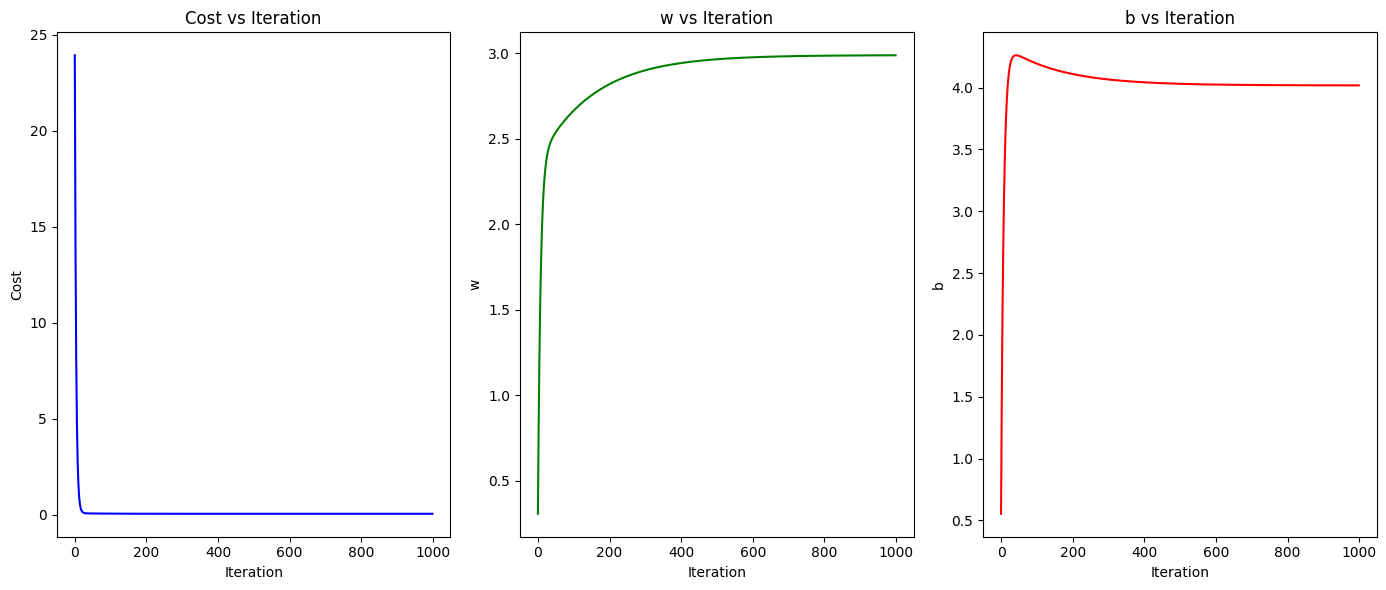

In [17]:
# Function to compute gradients with respect to w and b
def gradient(x, y, w, b):
    m = len(x)
    predictions = w * x + b
    errors = predictions - y
    dj_dw = (1/m) * np.sum(errors * x)
    dj_db = (1/m) * np.sum(errors)
    return dj_dw, dj_db

# Function to compute the mean square error
def cost(x, y, w, b):
    predictions = w * x + b
    errors = predictions - y
    mse = np.mean(errors ** 2)
    return mse

# Gradient descent function to adjust w and b
def gradient_descent(x, y, w_in, b_in, alpha, num_iters, cost, gradient):
    w = copy.deepcopy(w_in)
    b = b_in
    w = w_in
    J_history = []
    p_history = []

    for i in range(num_iters):
        dj_dw, dj_db = gradient(x, y, w, b)

        b = b - alpha * dj_db
        w = w - alpha * dj_dw

        if i < 100000:    
            J_history.append(cost(x, y, w, b))
            p_history.append([w, b])

        if i % math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4}: Cost {J_history[-1]:0.2e} ",
                  f"dj_dw: {dj_dw: 0.3e}, dj_db: {dj_db: 0.3e}  ",
                  f"w: {w: 0.3e}, b:{b: 0.5e}")

    return w, b, J_history, p_history

# Function to generate linear data with noise
def linear_graph(N=1000, w=3., b=4., s=0.25, min_x=0., max_x=1.):
    x = (max_x - min_x) * np.random.random(N) + min_x
    return x, np.random.normal(0, s, N) + w * x + b

# Generate data
x, y = linear_graph(N=1000, w=3., b=4., s=0.25)

# Initialize parameters for gradient descent
w_init = 0.0
b_init = 0.0
alpha = 0.1
num_iters = 1000

# Run gradient descent to fit the line
w_final, b_final, J_history, p_history = gradient_descent(x, y, w_init, b_init, alpha, num_iters, cost, gradient)

# Plotting the cost over iterations
plt.figure(figsize=(14, 6))
plt.subplot(1, 3, 1)
plt.plot(J_history, 'b-')
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost vs Iteration')

# w and b values from p_history for plotting
w_values = [p[0] for p in p_history]
b_values = [p[1] for p in p_history]

# Plotting w over iterations
plt.subplot(1, 3, 2)
plt.plot(w_values, 'g-')
plt.xlabel('Iteration')
plt.ylabel('w')
plt.title('w vs Iteration')

# Plotting b over iterations
plt.subplot(1, 3, 3)
plt.plot(b_values, 'r-')
plt.xlabel('Iteration')
plt.ylabel('b')
plt.title('b vs Iteration')
plt.tight_layout()
plt.show()
